<a href="https://colab.research.google.com/github/Gongmijoo/jini/blob/main/%EC%9B%94%EC%84%B8%EC%99%80%20%EB%B3%80%EC%88%98%EB%93%A4%EC%9D%98%20%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
!pip install pingouin
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [4]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumbarunGothic')

In [5]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
import pandas as pd
import math
import sklearn.preprocessing 
from scipy import stats
import pingouin as pg
import scikit_posthocs
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from os import supports_bytes_environ
from sklearn.feature_selection import SelectKBest, chi2 

#*목표*
##월세와 관련한 다양한 변수들과의 상관관계를 구하고 선형회귀 모델을 구축하여 실제 데이터값을 입력하여 예측해보기

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/복사본 train.csv", encoding= "cp949") #encoding = "utf-8"
df

,이름,집 종류,방 개수,지하철 거리,공항 거리,병원 거리,기차 거리,면적,월세 달러
0,Train_0000,Apartment,3,0.312579,22.646032,11.726966,7.352495,83.61,307
1,Train_0001,Independent Floor,1,2.486167,13.500583,7.527761,15.877066,83.61,110
2,Train_0002,Independent Floor,3,1.528794,18.918243,17.135939,10.315737,78.97,369
3,Train_0003,Independent Floor,3,0.967121,17.749252,16.251937,9.797817,162.58,676
4,Train_0004,Apartment,4,0.834506,4.288189,15.541840,18.179806,218.32,418
...,...,...,...,...,...,...,...,...,...
8687,Train_8687,Apartment,1,0.005681,7.776390,18.212199,19.535831,46.45,159
8688,Train_8688,Apartment,1,0.007987,12.969368,9.442664,5.039023,81.29,172
8689,Train_8689,Independent Floor,3,0.203502,17.094466,5.468956,11.109941,148.64,738
8690,Train_8690,Independent Floor,1,0.248603,20.628700,9.801128,5.679541,41.90,184


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      8692 non-null   object 
 1   집 종류    8692 non-null   object 
 2   방 개수    8692 non-null   int64  
 3   지하철 거리  8692 non-null   float64
 4   공항 거리   8692 non-null   float64
 5   병원 거리   8692 non-null   float64
 6   기차 거리   8692 non-null   float64
 7   면적      8692 non-null   float64
 8   월세 달러   8692 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 611.3+ KB


In [8]:
df.isnull().sum()

이름        0
집 종류      0
방 개수      0
지하철 거리    0
공항 거리     0
병원 거리     0
기차 거리     0
면적        0
월세 달러     0
dtype: int64

In [9]:
df.describe()

,방 개수,지하철 거리,공항 거리,병원 거리,기차 거리,면적,월세 달러
count,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000
mean,2.119650,0.869998,13.699359,11.373803,11.419991,101.990737,321.376898
std,0.900757,1.261337,7.926709,7.500915,7.345131,59.355027,230.962181
min,1.000000,0.002892,1.901789,0.669150,0.722023,9.290000,14.000000
25%,1.000000,0.459687,11.152285,8.167231,8.075549,55.740000,159.000000
50%,2.000000,0.698592,13.139656,10.922441,11.244344,83.610000,258.000000
75%,3.000000,1.092694,17.225196,15.548549,15.435535,139.350000,393.000000
max,8.000000,65.866623,396.043067,387.016246,390.969378,882.580000,1476.000000


In [10]:
df.columns

Index(['이름', '집 종류', '방 개수', '지하철 거리', '공항 거리', '병원 거리', '기차 거리', '면적',
       '월세 달러'],
      dtype='object')

In [11]:
df1=df.drop([df.columns[0]],axis = 1) #columns[0]을 지정해서 '이름'의 열을 삭제해줌
df=df1
df

,집 종류,방 개수,지하철 거리,공항 거리,병원 거리,기차 거리,면적,월세 달러
0,Apartment,3,0.312579,22.646032,11.726966,7.352495,83.61,307
1,Independent Floor,1,2.486167,13.500583,7.527761,15.877066,83.61,110
2,Independent Floor,3,1.528794,18.918243,17.135939,10.315737,78.97,369
3,Independent Floor,3,0.967121,17.749252,16.251937,9.797817,162.58,676
4,Apartment,4,0.834506,4.288189,15.541840,18.179806,218.32,418
...,...,...,...,...,...,...,...,...
8687,Apartment,1,0.005681,7.776390,18.212199,19.535831,46.45,159
8688,Apartment,1,0.007987,12.969368,9.442664,5.039023,81.29,172
8689,Independent Floor,3,0.203502,17.094466,5.468956,11.109941,148.64,738
8690,Independent Floor,1,0.248603,20.628700,9.801128,5.679541,41.90,184


#MSE(평균 제곱 오차)-정확성 추측하기

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num=["지하철 거리","공항 거리","병원 거리","기차 거리","면적"]
cg=["집 종류","방 개수"]

X = df[num+cg]
Y = df["월세 달러"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train,Y_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

[-0.35173434  1.40638919 -0.39062455 -0.55836528  0.6221927   1.
  0.          0.          0.          0.          0.          1.
  0.          0.          0.          0.        ]


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression().fit(X_train, Y_train) #선형회귀

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("test R2 : {:.3f}".format(lr.score(X_test, Y_test)))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))

predict value
 [143.61742072 192.08554143 487.04738192 ... 385.22072487 466.48917464
 129.98168676]
train R2 : 0.688
test R2 : 0.232
RMSE: 206.283


In [14]:
print("절편", np.round(lr.intercept_, 3))
print("가중치(beta)", np.round(lr.coef_, 3))

절편 274.432
가중치(beta) [   9.358   -2.205  -48.816  -32.025  151.895   19.871   55.94    23.055
  -98.866  -45.574  -14.391   55.14   100.736  -78.428  699.534 -717.017]


#KNN 사용한 오차범위와 정확성 구하기(같은 값으로)

In [15]:
import numpy as np

num=["지하철 거리","공항 거리","병원 거리","기차 거리","면적"]
cg=["집 종류","방 개수"]

X = df[num+cg]
Y = df["월세 달러"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train,Y_train)
X_test = ct.transform(X_test)
X_train = ct.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 9, p=2)
#p : int, default=2
#power parameter for the minkowski metric. when p =1
#this is equivalent to using manhattan_distance(l1), and euclidean_distance(l2) for p=2, For arbitary p,minkowski distance
# 1은 맨하탄 2는 유클리디안 

knn_reg.fit(X_train,Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy: {:.3f}".format(knn_reg.score(X_train,Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE {:.3f}".format(rmse))

accuracy: 0.837
RMSE 106.631


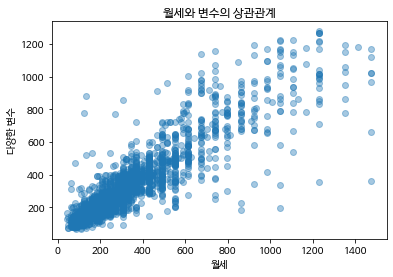

In [16]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred, alpha=0.4)
plt.xlabel("월세")
plt.ylabel("다양한 변수")
plt.title("월세와 변수의 상관관계")
plt.show()